### Importing Libraries

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline

$$\dfrac{dS}{dt}=P-BSZ-nS$$

$$\dfrac{dZ}{dt}=BSZ+GR-ASZ$$

$$\dfrac{dR}{dt}=nS+ASZ-GR$$

$S$: the number of susceptible victims (Initial 500)

$Z$: the number of zombies (Initial 0)

$R$: the number of people "killed" (Initial 0)

$P$: the population birth rate (Here 0)

$n$: the chance of a natural death (Here 0.0001)

$B$: the chance the "zombie disease" is transmitted (an alive person becomes a zombie) (Here 0.0095)

$G$: the chance a dead person is resurrected into a zombie (Here 0.0001)

$A$: the chance a zombie is totally destroyed (Here 0.0001)


Let $X = [S, Z, R]$

In [2]:
def model(X,t,P,n,B,G,A):
    '''
    function that returns dX/dt
    '''
    S = X[0]
    Z = X[1]
    R = X[2]
    dSdt = P - B*S*Z - n*S
    dZdt = B*S*Z + G*R - A*S*Z
    dRdt = n*S + A*S*Z - G*R
    dXdt = [dSdt, dZdt, dRdt]
    return dXdt

In [3]:
# Initial Conditions and constants
X_0 = [500,0,0] 
P = 0
n = 0.0001
B = 0.0095
G = 0.0001
A = 0.0001

In [4]:
t = np.linspace(0,5,1000) # Time Points

In [5]:
X = odeint(model, X_0, t, args=(P,n,B,G,A)) # Solving the System

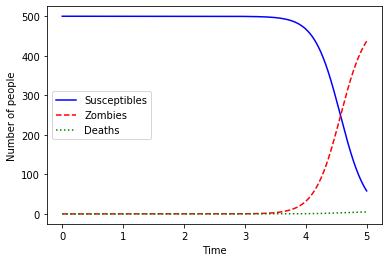

In [6]:
plt.plot(t,X[:,0],'b-',label=r'Susceptibles')
plt.plot(t,X[:,1],'r--',label=r'Zombies')
plt.plot(t,X[:,2],'g:',label=r'Deaths')
plt.ylabel('Number of people')
plt.xlabel('Time')
plt.legend(loc='best')
plt.show()